<a href="https://colab.research.google.com/github/atefeshiri/ML/blob/master/mlpclassification-hand-written-digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import all the needed module
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

digits = load_digits()

Number of samples in training set: 360
number of samples in test set: 1437


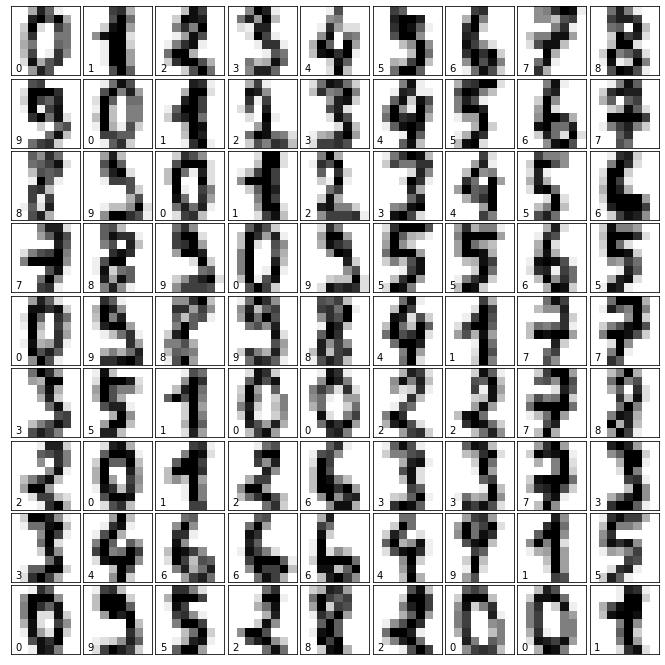

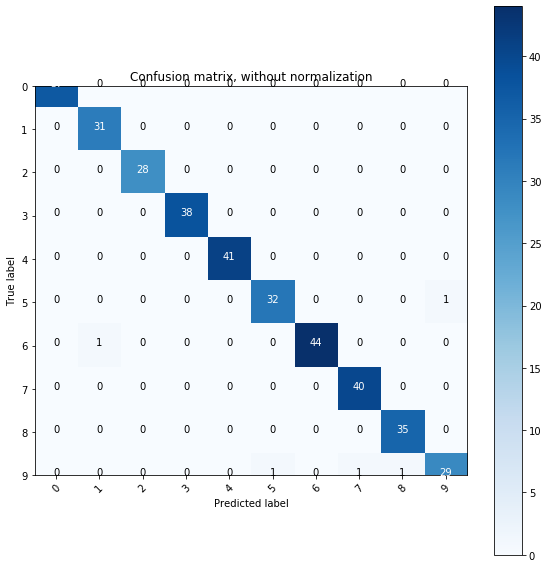

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       0.98      1.00      0.99        40
           8       0.97      1.00      0.99        35
           9       0.97      0.91      0.94        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

accuracy: 98.61111111111111
mean: 0.9861111111111132


In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=20)
print('Number of samples in training set:', len(y_test))
print("number of samples in test set:",len(y_train))

fig = plt.figure(figsize = (9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

    
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(200),shuffle=True,momentum=0.9, activation='logistic', max_iter = 1000,learning_rate_init=0.001)
mlp.fit(X_train_scaled,y_train)
    
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
 
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()    
    
    
predicted = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,title='Confusion matrix, without normalization')
print(classification_report(y_test,predicted))
a =0
for i in range(100):
    a +=np.mean(predicted == y_test)

print("accuracy:",100.0 * np.mean(predicted == y_test))
print("mean:",a/100)

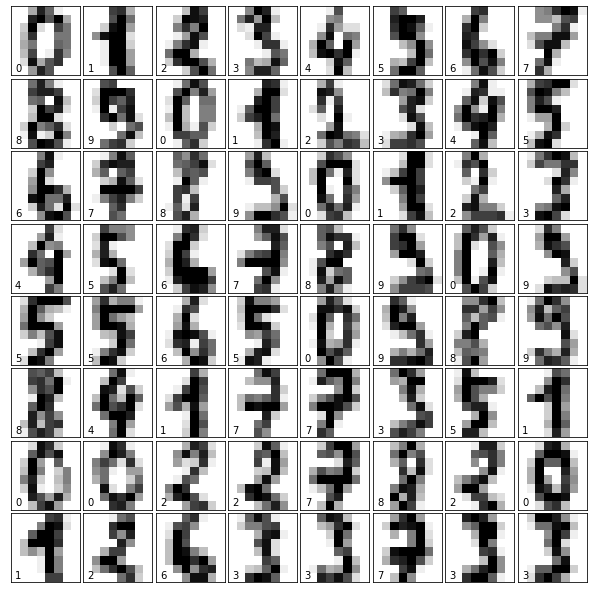

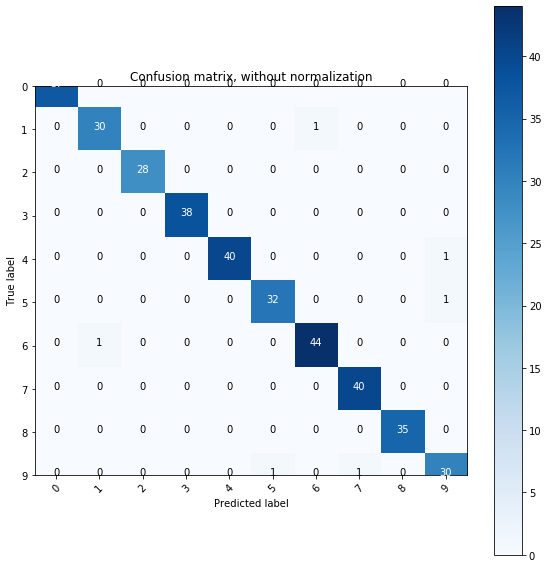

--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.97      0.97        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      0.98      0.99        41
           5       0.97      0.97      0.97        33
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        35
           9       0.94      0.94      0.94        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

--------------------------------------------------------------
mean: 0.983333333333334
accuracy = 98.33


In [4]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))



mlp = MLPClassifier(hidden_layer_sizes=(600),momentum=0.9,shuffle=True, activation='logistic', max_iter = 1000,learning_rate_init=0.001)
mlp.fit(X_train_scaled,y_train)
predicted = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,title='Confusion matrix, without normalization')
print('--------------------------------------------------------------')
print(classification_report(y_test,predicted))
print('--------------------------------------------------------------')
a =0
for i in range(100):
    a +=np.mean(predicted == y_test)

print("mean:",a/100)
print("accuracy = %.2f" % (100.0 * np.mean(predicted == y_test),))

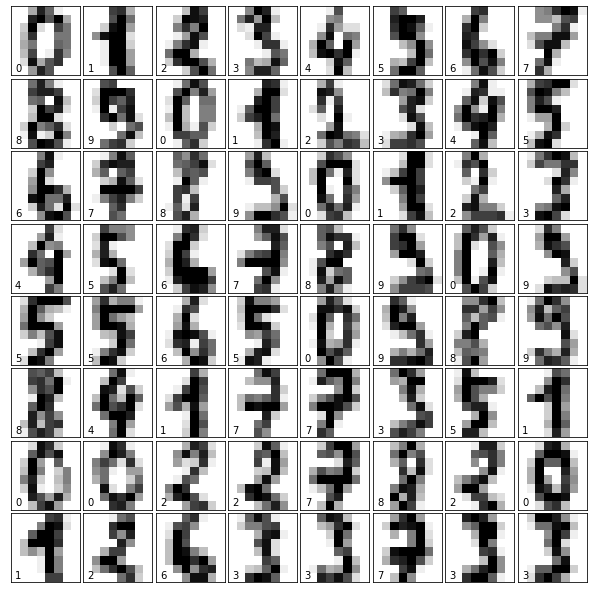

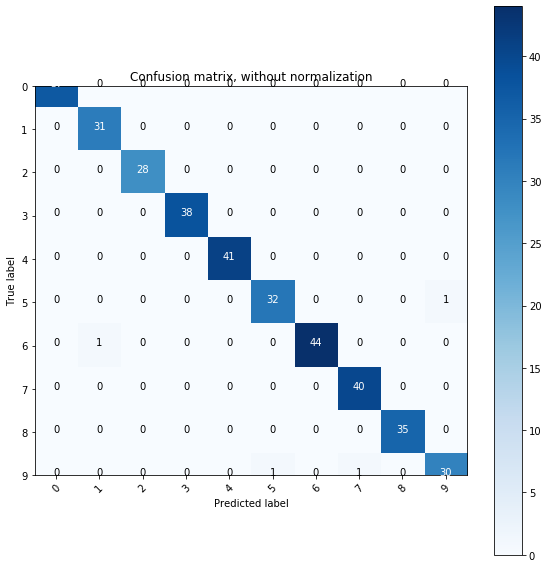

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       0.98      1.00      0.99        40
           8       1.00      1.00      1.00        35
           9       0.97      0.94      0.95        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

mean: 0.98888888888889
accuracy = 98.89


In [5]:

fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
mlp = MLPClassifier(hidden_layer_sizes=(300,500),momentum=0.9,shuffle=True, activation='logistic', max_iter = 1000,learning_rate_init=0.001)

# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)
    # پیش بینی دادههای تست
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,
                      title='Confusion matrix, without normalization')
print(classification_report(y_test,predicted))
a =0
for i in range(100):
    a +=np.mean(predicted == y_test)

print("mean:",a/100)
print("accuracy = %.2f" % (100.0 * np.mean(predicted == y_test),))

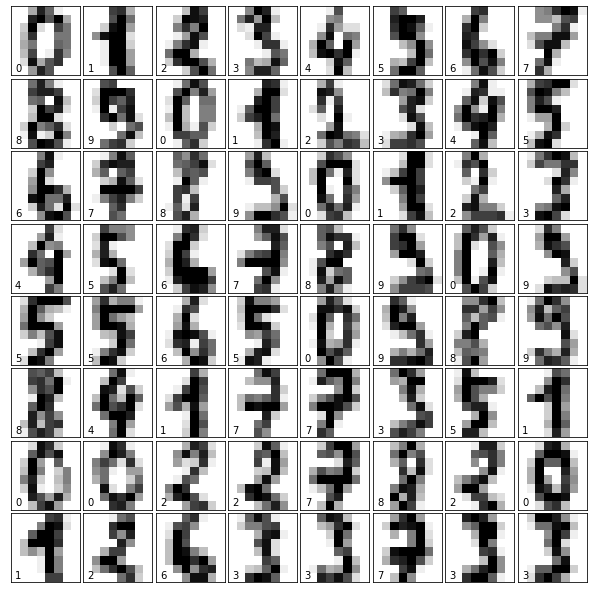

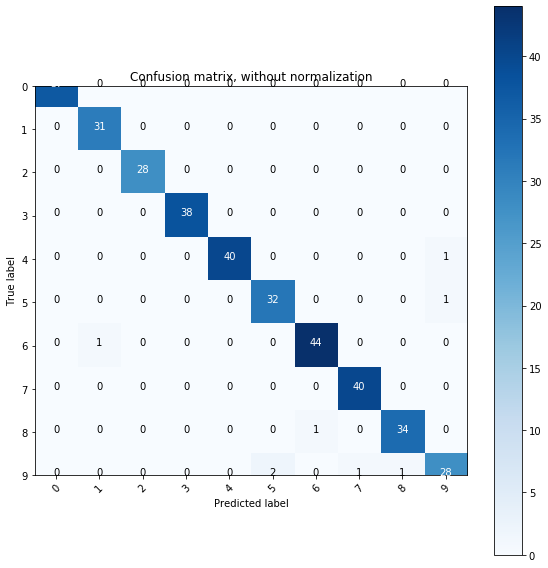

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      0.98      0.99        41
           5       0.94      0.97      0.96        33
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        40
           8       0.97      0.97      0.97        35
           9       0.93      0.88      0.90        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

mean: 0.9777777777777754
accuracy = 97.78


In [6]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))


mlp = MLPClassifier(hidden_layer_sizes=(50),momentum=0.9,shuffle=True, activation='logistic', max_iter = 1000,learning_rate_init=0.001)

mlp.fit(X_train_scaled,y_train)

predicted = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,title='Confusion matrix, without normalization')
print(classification_report(y_test,predicted))
a =0
for i in range(100):
    a +=np.mean(predicted == y_test)

print("mean:",a/100)
print("accuracy = %.2f" % (100.0 * np.mean(predicted == y_test),))

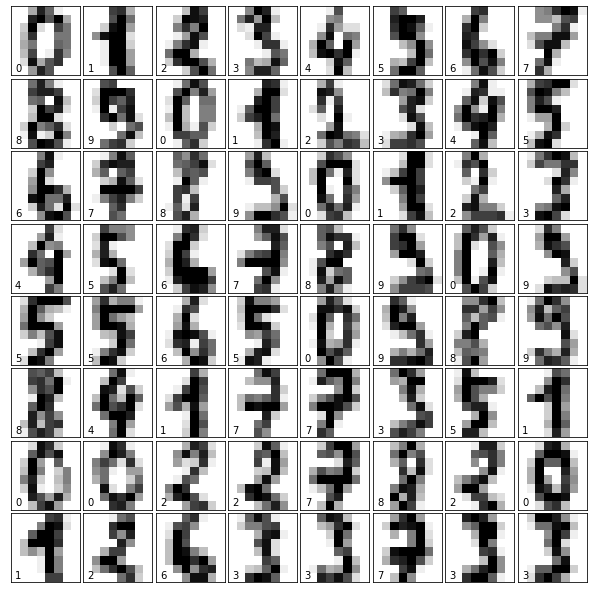

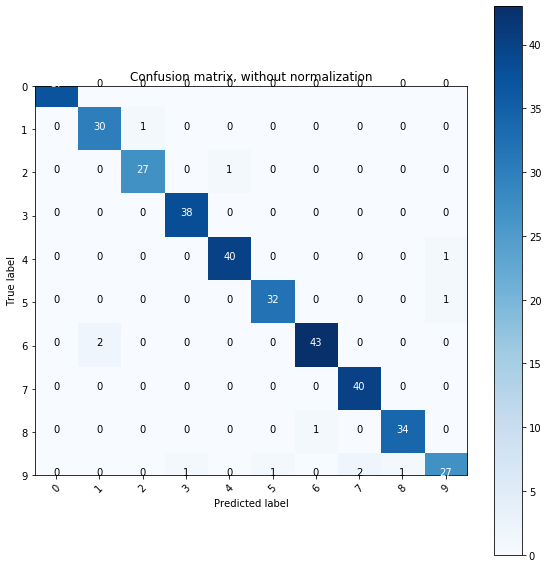

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.97      0.95        31
           2       0.96      0.96      0.96        28
           3       0.97      1.00      0.99        38
           4       0.98      0.98      0.98        41
           5       0.97      0.97      0.97        33
           6       0.98      0.96      0.97        45
           7       0.95      1.00      0.98        40
           8       0.97      0.97      0.97        35
           9       0.93      0.84      0.89        32

    accuracy                           0.97       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.97      0.97       360

mean: 0.9666666666666676
accuracy = 96.67


In [7]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))


mlp = MLPClassifier(hidden_layer_sizes=(25,50),momentum=0.9,shuffle=True, activation='logistic', max_iter = 1000,learning_rate_init=0.001)

mlp.fit(X_train_scaled,y_train)
predicted = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,title='Confusion matrix, without normalization')
print(classification_report(y_test,predicted))
a =0
for i in range(100):
    a +=np.mean(predicted == y_test)

print("mean:",a/100)
print("accuracy = %.2f" % (100.0 * np.mean(predicted == y_test),))